<a href="https://colab.research.google.com/github/TanviTakkar/TanviTakkar/blob/main/Data_visualization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flight_price=pd.read_excel("/content/flight_price.xlsx")

In [ ]:
flight_price.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**1.Dimension of dataset**




In [ ]:
flight_price.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
flight_price.shape

(10683, 11)

**2.Creating histogram to visualize the contribution of prices in dataset**



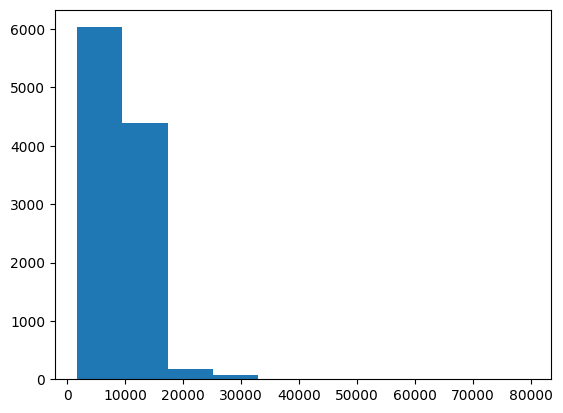

In [ ]:
plt.hist(flight_price['Price'])
plt.show()

**3.What is the range of prices in the dataset? What is the minimum and maximum price?**

In [ ]:
#max value
max_value=flight_price['Price'].max()
#min value
min_value=flight_price['Price'].min()
#range of values in Price column
range=max_value-min_value

In [ ]:
print('max_value: ',max_value)
print('min_value: ',min_value)
print('range:     ',range)

max_value:  79512
min_value:  1759
range:      77753


**4.How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.**

In [ ]:
counts=flight_price['Price']
data=pd.DataFrame(counts.groupby(flight_price['Airline']))
data

,0,1
0,Air Asia,43 3383 54 4483 189 3383 235 ...
1,Air India,1 7662 10 8907 12 4667 1...
2,GoAir,20 19495 27 7682 76 3898 1...
3,IndiGo,0 3897 3 6218 4 13302 1...
4,Jet Airways,2 13882 6 11087 7 22270 8...
5,Jet Airways Business,657 52229 2924 79512 5372 62427 7...
6,Multiple carriers,9 8625 40 9646 44 13062 5...
7,Multiple carriers Premium economy,717 10161 1799 9845 4627 10161 4718...
8,SpiceJet,5 3873 16 5830 36 4649 45 ...
9,Trujet,"2878 4140 Name: Price, dtype: int64"


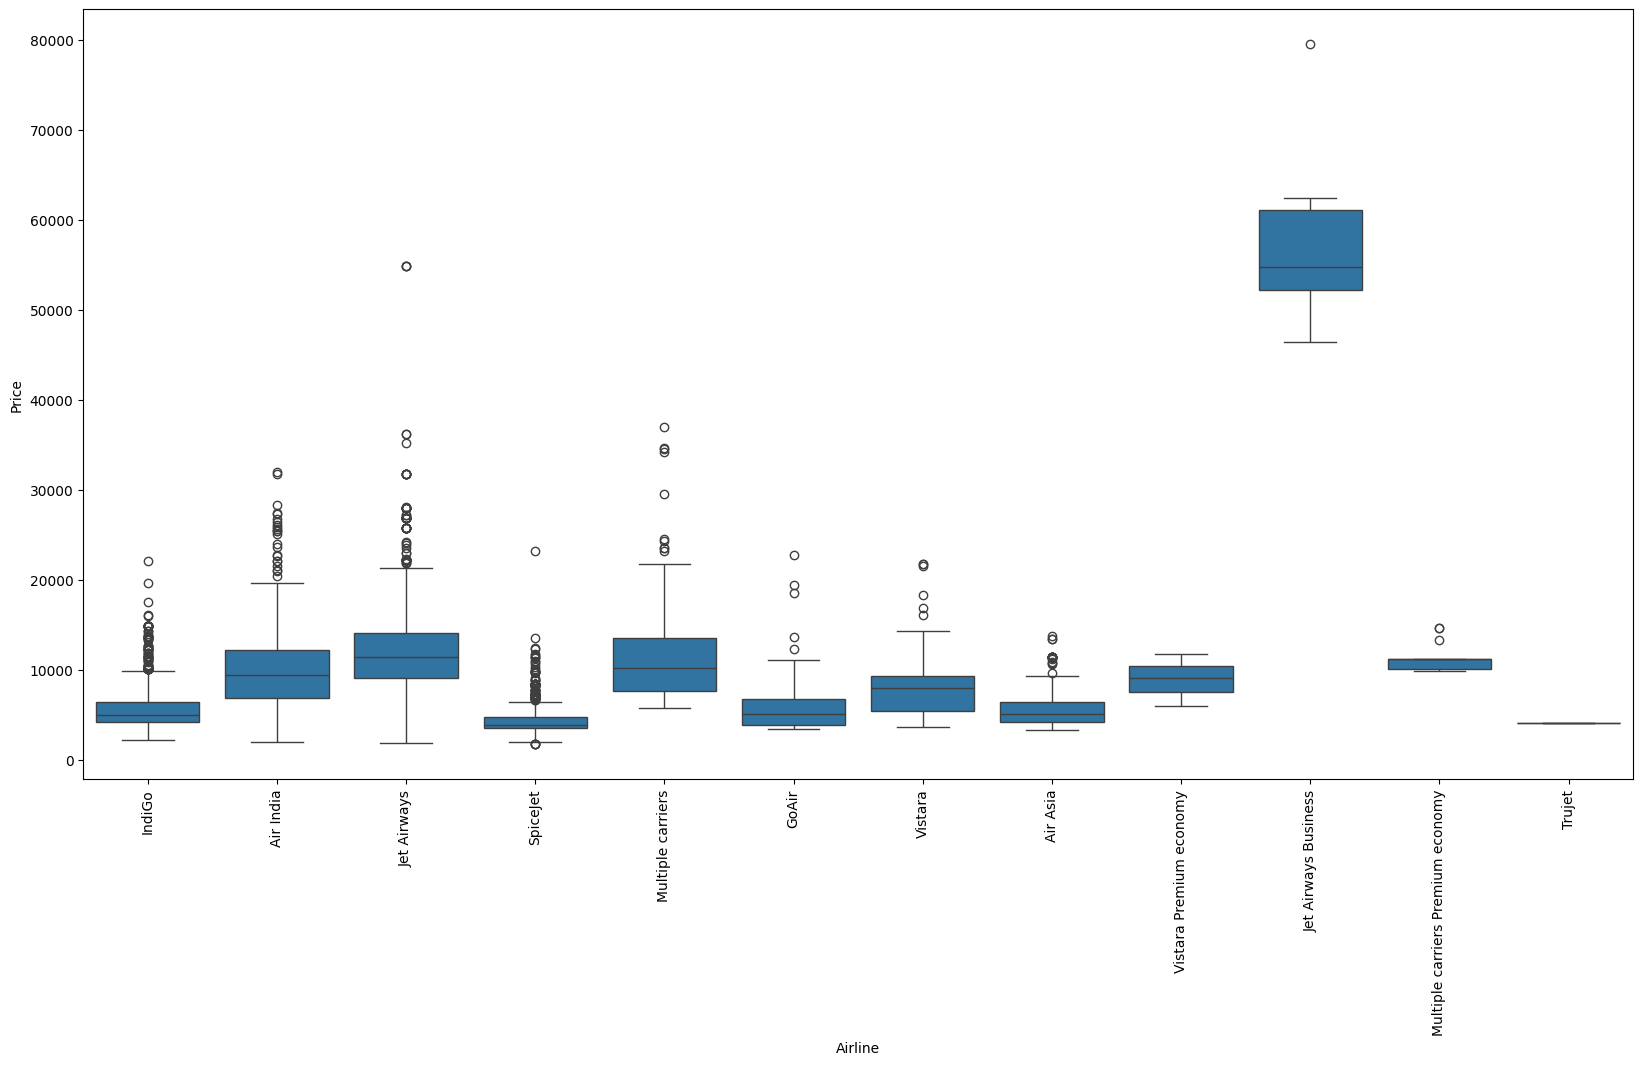

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(x=flight_price['Airline'],y=flight_price['Price'])
plt.xticks(rotation=90)
plt.show()

**5.Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.**

In [ ]:
# Calculate quartiles
Q1 = flight_price['Price'].quantile(0.25)
Q3 = flight_price['Price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on IQR bounds
data_no_outliers = flight_price[(flight_price['Price'] >= lower_bound) & (flight_price['Price'] <= upper_bound)]
data_no_outliers


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
counts1=data_no_outliers['Price']
data1=pd.DataFrame(counts1.groupby(data_no_outliers['Airline']))
data1

,0,1
0,Air Asia,43 3383 54 4483 189 3383 235 ...
1,Air India,1 7662 10 8907 12 4667 1...
2,GoAir,20 19495 27 7682 76 3898 1...
3,IndiGo,0 3897 3 6218 4 13302 1...
4,Jet Airways,2 13882 6 11087 7 22270 8...
5,Multiple carriers,9 8625 40 9646 44 13062 5...
6,Multiple carriers Premium economy,717 10161 1799 9845 4627 10161 4718...
7,SpiceJet,5 3873 16 5830 36 4649 45 ...
8,Trujet,"2878 4140 Name: Price, dtype: int64"
9,Vistara,28 4668 29 3687 30 3687 5...


HERE WE CAN SEE THE "JET AIRWAYS BUSINESS" WHICH WAS SHOWING IN THE ABOVE BOXPLOT HAS BEEN REMOVED IN THE BELOW PLOT AS IT HAS HUGE VALUE OF OUTLIER IN THE DATASET

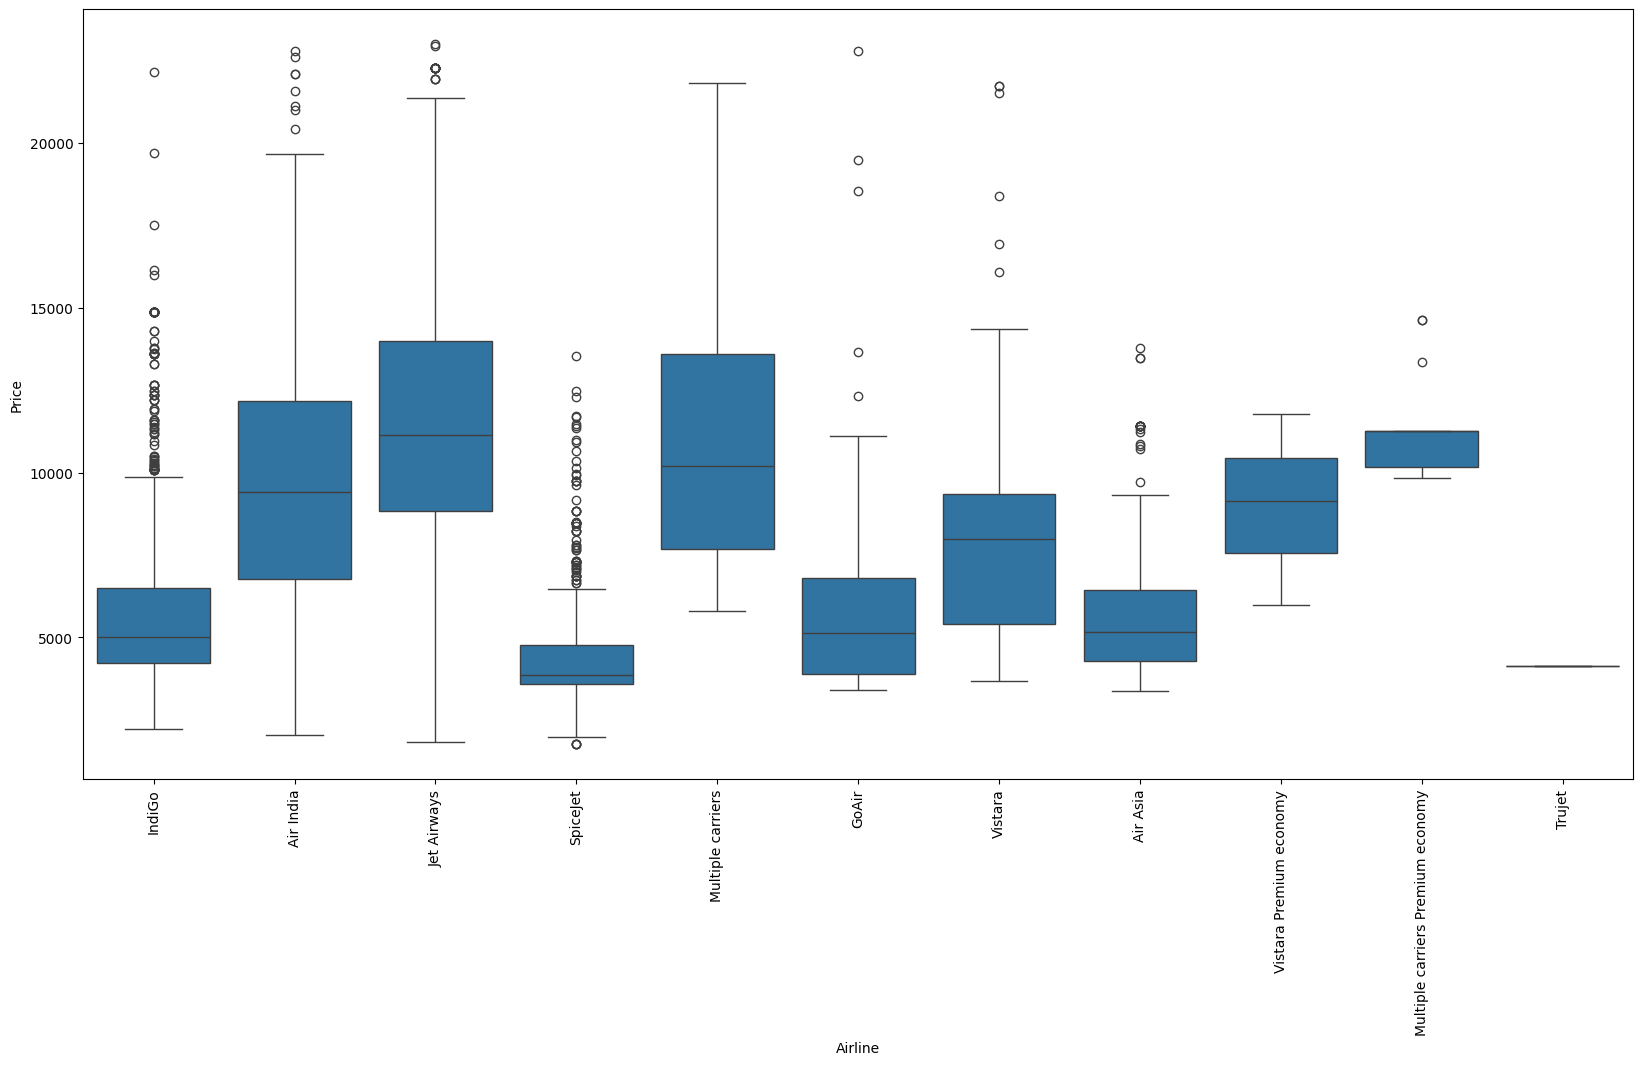

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(x=data_no_outliers['Airline'],y=data_no_outliers['Price'])
plt.xticks(rotation=90)
plt.show()

***HERE WE CAN OBSERVE THAT THE DATA HAVING OUTLIERS AND DATA AFTER REMOVAL OF OUTLIERS ,WE SEE A HUGE DIFFERENCE IN MEAN AND STANDARD DEVIATION BUT THE MEDIIAN SHOWS A MINIMAL CHANGE:***

In [ ]:
data_no_outliers.describe()

,Price
count,10589.000000
mean,8897.661724
std,4069.120294
min,1759.000000
25%,5228.000000
50%,8355.000000
75%,12312.000000
max,23001.000000


In [ ]:
data_no_outliers.median()

<ipython-input-60-40a90cd44abf>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_no_outliers.median()


Price    8355.0
dtype: float64

In [ ]:
flight_price.median()

<ipython-input-61-8912d22fedf0>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flight_price.median()


Price    8372.0
dtype: float64

In [ ]:
flight_price.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**6.You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?**

To identify the season of travel in the airline ticket dataset, I analyzed the following characteristics:
Date or time: Analyzing airline tickets from different months or seasons can help identify when prices tend to be higher or lower. This could mean grouping the data by month or time of year and calculating the average price for each period.
Destination: By understanding which destinations are more in demand at certain times of the year, you can get an idea of the peak travel season. Some destinations may be more popular during holidays, festivals or certain weather conditions.
Airline: Different airlines may have different pricing strategies and seasonal differences. Analyzing average fares offered by different airlines over time can help identify peak travel periods.
Special Events: Identifying special events such as festivals, conferences or major holidays that coincide with times of increased travel demand can also help identify peak travel seasons..


In [ ]:
flight_price.sort_values(by='Price',ascending=False)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
...,...,...,...,...,...,...,...,...,...,...,...
1513,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759


In [ ]:
average=flight_price.groupby('Airline')['Price'].mean()
average1=average.sort_values(ascending=False)
average1

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Mean Values Grouped by Airline')

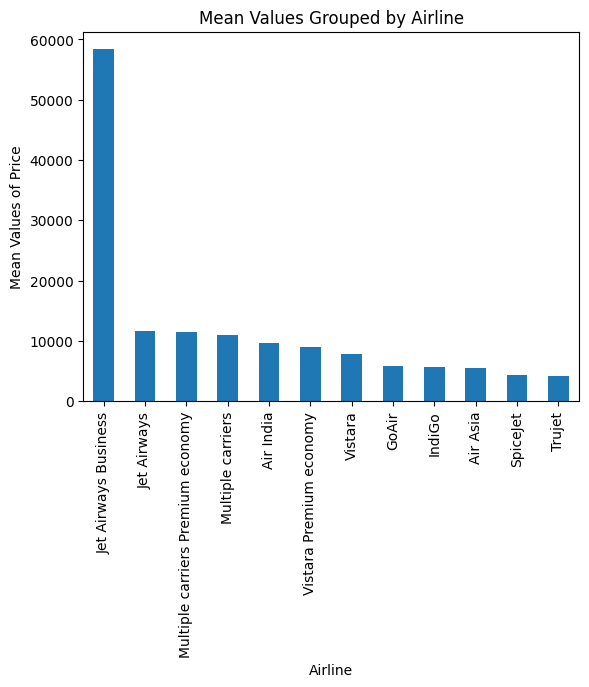

In [ ]:
average1.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Mean Values of Price')
plt.title('Mean Values Grouped by Airline')

In [ ]:
average_by_dest=flight_price.groupby('Destination')['Price'].mean()
average2=average_by_dest.sort_values(ascending=False)
average2

Destination
New Delhi    11917.716738
Cochin       10539.439057
Banglore      9158.389411
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
Name: Price, dtype: float64

Text(0.5, 1.0, 'Peak values of Prices according to Destination')

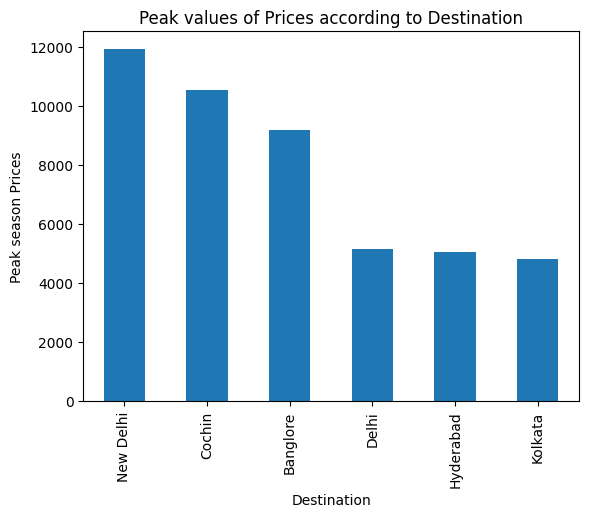

In [ ]:
average2.plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Peak season Prices')
plt.title('Peak values of Prices according to Destination')

In [ ]:
#changing the data of date_of_journey
flight_price['date']=flight_price['Date_of_Journey'].str.split('/').str[0]
flight_price['month']=flight_price['Date_of_Journey'].str.split('/').str[1]
flight_price['year']=flight_price['Date_of_Journey'].str.split('/').str[2]

In [ ]:
flight_price.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [ ]:
average_by_date=flight_price.groupby('month')['Price'].mean()
average3=average_by_date.sort_values(ascending=False)
average3

month
03    10673.205580
05     9127.247548
06     8828.796134
04     5770.847081
Name: Price, dtype: float64

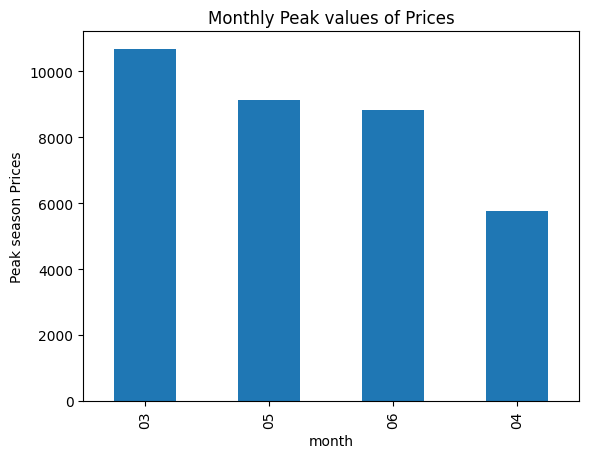

In [ ]:
average3.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()

**7.You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?**

To identify trends in flight prices in the price data, I analyzed the following characteristics: Date or time, Route, Airline, Number of stops
To present my findings to the group

In [ ]:
average_by_date=flight_price.groupby('month')['Price'].mean()
average4=pd.DataFrame(average_by_date.sort_values(ascending=False))
average4=average4.reset_index()
average4=average4.sort_values(by='month')
average4

,month,Price
0,03,10673.205580
3,04,5770.847081
1,05,9127.247548
2,06,8828.796134


As according to this bar plot we can see how the prices vary month wise

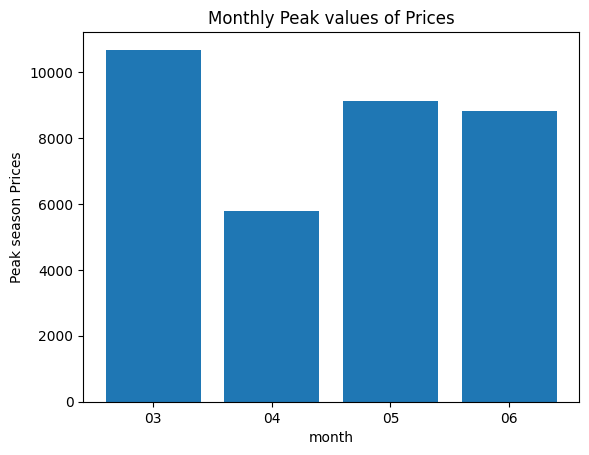

In [ ]:
plt.bar(average4['month'],average4['Price'])
plt.xlabel('month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()

Now we can see the trend according to airline

In [ ]:
average5=flight_price.groupby('Airline')['Price'].mean()
average6=average.sort_values(ascending=False)
average6=pd.DataFrame(average6)
average6=average6.reset_index()
average6

,Airline,Price
0,Jet Airways Business,58358.666667
1,Jet Airways,11643.923357
2,Multiple carriers Premium economy,11418.846154
3,Multiple carriers,10902.678094
4,Air India,9611.210616
5,Vistara Premium economy,8962.333333
6,Vistara,7796.348643
7,GoAir,5861.056701
8,IndiGo,5673.682903
9,Air Asia,5590.260188


Text(0.5, 1.0, 'Trend of flight prices according to airline')

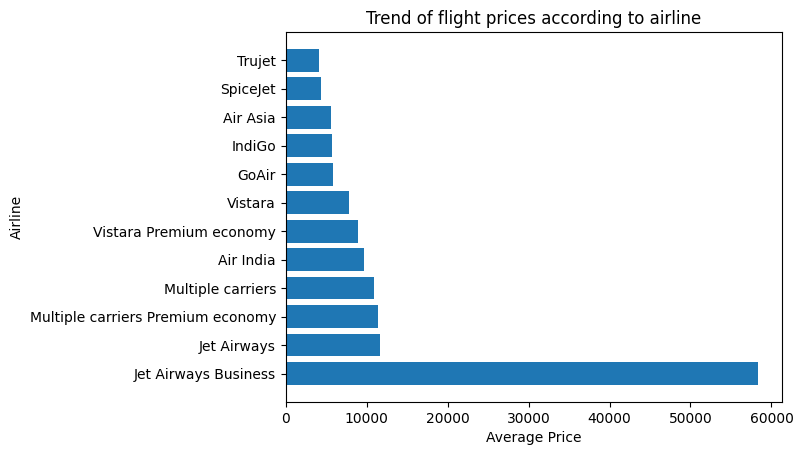

In [ ]:
#plt.figure(figsize=(28,5))
plt.barh(average6['Airline'],average6['Price'])
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.title('Trend of flight prices according to airline')

Here we can also see the trend of flight prices depending upon the number of stops

In [ ]:
stops=flight_price.groupby('Total_Stops')['Price'].mean()
avg_stops=stops.sort_values(ascending=  True)
avg_stops

Total_Stops
non-stop     5024.900315
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
Name: Price, dtype: float64

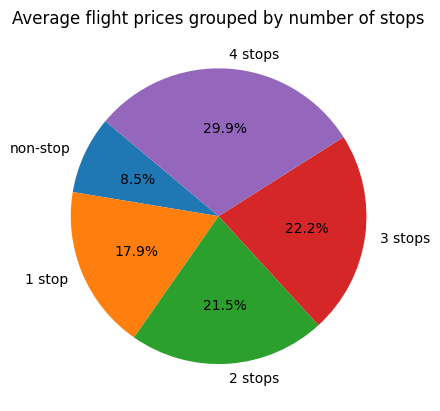

In [ ]:
plt.pie(avg_stops, labels=avg_stops.index, autopct='%1.1f%%', startangle=140)
plt.title('Average flight prices grouped by number of stops')
plt.show()

**8.You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?**

To identify factors affecting flight prices in the Flight Price dataset, I would analyze features such as:
Date and Tim, Route, Airline, Booking Class, Advance Booking Period and many more.

I would present my findings to the management team through a combination of:
Visualizations: Utilize graphs, charts, and heatmaps to visually represent relationships between flight prices and the identified factors.
Summary Statistics: Provide key statistical metrics such as mean, median, and standard deviation to summarize the data.
Insights and Recommendations: Offer actionable insights and strategic recommendations based on the analysis to optimize pricing strategies and enhance competitiveness.




AS MANY FEATURES ARE AFFECTING THE FLIGHT PRICES LIKE ACCORDING TO MONTH,NUMBER OF STOPS,DESTINATON,AIRLINE ETC

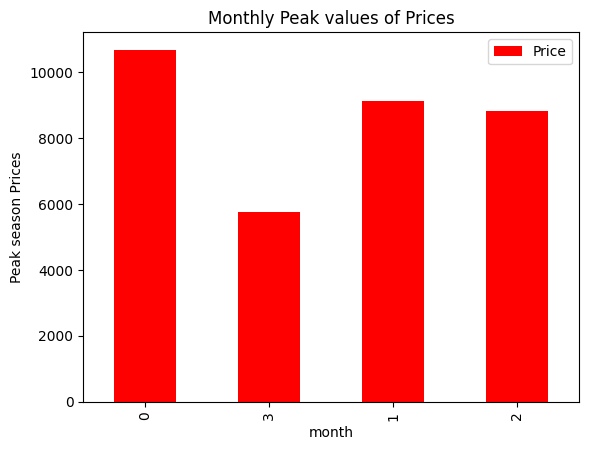

In [ ]:
#ACCORDING TO PRICES
average3.plot(kind='bar',color='red')
plt.xlabel('month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()

Text(0.5, 1.0, 'Trend of flight prices according to airline')

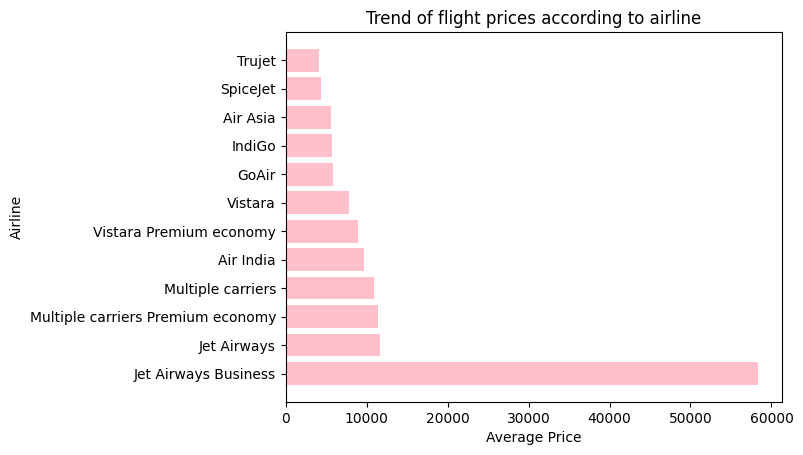

In [ ]:
#ACCORDING TO AIRLINE
plt.barh(average6['Airline'],average6['Price'],color='pink')
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.title('Trend of flight prices according to airline')

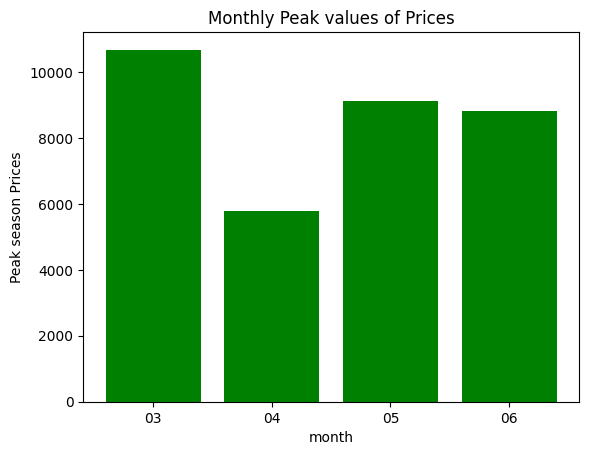

In [ ]:
#ACCORDING TO MONTHS
plt.bar(average4['month'],average4['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()

***FOR GOOGLE PLAYSTORE DATA***

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
def convert_size(size):
  if 'M' in size:
    return int(float(size.replace('M',''))*1000)
  elif 'k' in size:
    return float(size.replace('k',''))
  elif 'Varies with device' in size:
    return np.nan
  else:
    np.nan

In [6]:
df['Size']=df['Size'].apply(convert_size)

In [7]:
#remove duplicates from column app
df.drop_duplicates(subset=['App'],keep='first',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
cols=['Installs','Price']
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i]=df[i].str.replace(j,'')

<ipython-input-8-b3afd27c62f3>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i]=df[i].str.replace(j,'')


In [15]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
median_installs= df['Installs'].median()
df['Installs'] = df['Installs'].fillna(median_installs)


In [16]:
df['Installs']=df['Installs'].astype('int')


In [18]:
df['Price']=df['Price'].str.replace('$','')

<ipython-input-18-7b7051402535>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [20]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
median_price= df['Price'].median()
df['Price'] = df['Price'].fillna(median_price)


In [21]:
df['Price']=df['Price'].astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9660 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


**1.Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9660 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [24]:
df.describe()

,Rating,Size,Installs,Price
count,8197.000000,8432.000000,9.660000e+03,9660.000000
mean,4.175052,20395.289315,7.776712e+06,1.099185
std,0.561026,21827.542435,5.375555e+07,16.851283
min,1.000000,8.500000,0.000000e+00,0.000000
25%,4.000000,4600.000000,1.000000e+03,0.000000
50%,4.300000,12000.000000,1.000000e+05,0.000000
75%,4.500000,28000.000000,1.000000e+06,0.000000
max,19.000000,100000.000000,1.000000e+09,400.000000


**2.How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.**

In [46]:
#remove duplicates from column app
df.drop_duplicates(subset=['App'],keep='first',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
5862,Miami crime simulator,GAME,4.0,254518,100000.0,10000000,Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100000.0,5000000,Free,0,Everyone,Sports,"May 11, 2018",25.7,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000.0,5000000,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000.0,10000000,Free,0,Mature 17+,Simulation,"May 31, 2018",2.1,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,"The Championships, Wimbledon 2018",SPORTS,4.3,24082,95000.0,1000000,Free,0,Everyone,Sports,"July 4, 2018",6.5,4.4 and up
2284,Recognise Foot,MEDICAL,4.2,9,95000.0,1000,Paid,7,Everyone,Medical,"September 14, 2017",1.0.3,4.1 and up
6551,Boom Beach,FAMILY,4.5,5591653,95000.0,50000000,Free,0,Everyone 10+,Strategy,"July 18, 2018",35.119,4.0.3 and up
1781,Trivia Crack,GAME,4.5,6427773,95000.0,100000000,Free,0,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up


In [45]:
df.isnull().sum()

App               0
Category          0
Rating            4
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [43]:
df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
5862,Miami crime simulator,GAME,4.0,254518,100000.0,10000000,Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100000.0,5000000,Free,0,Everyone,Sports,"May 11, 2018",25.7,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000.0,5000000,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000.0,10000000,Free,0,Mature 17+,Simulation,"May 31, 2018",2.1,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,"The Championships, Wimbledon 2018",SPORTS,4.3,24082,95000.0,1000000,Free,0,Everyone,Sports,"July 4, 2018",6.5,4.4 and up
2284,Recognise Foot,MEDICAL,4.2,9,95000.0,1000,Paid,7,Everyone,Medical,"September 14, 2017",1.0.3,4.1 and up
6551,Boom Beach,FAMILY,4.5,5591653,95000.0,50000000,Free,0,Everyone 10+,Strategy,"July 18, 2018",35.119,4.0.3 and up
1781,Trivia Crack,GAME,4.5,6427773,95000.0,100000000,Free,0,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up


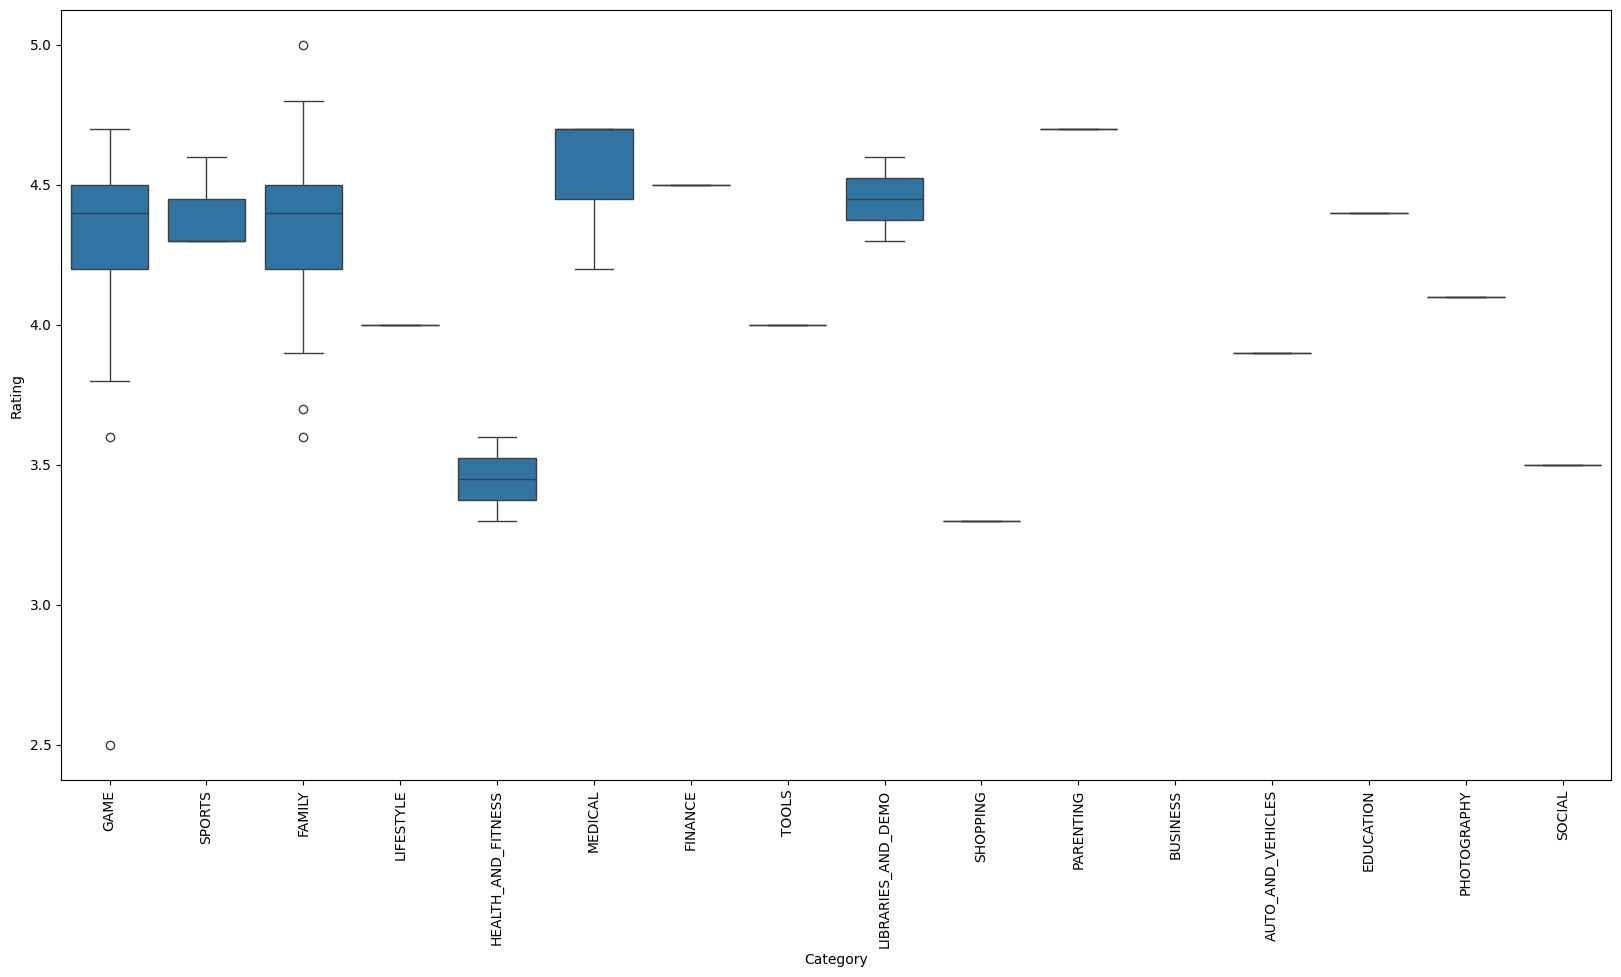

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Category'],y=df['Rating'])
plt.xticks(rotation=90)
plt.show()

**3.Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.**

As in below figures the missing and error values are 1000+, installs like Free and content rating is NaN.
Missing values in a dataset can have various impacts on the analysis:

Biased Analysis: If missing values are not handled properly, it can lead to biased analysis because the available data may not be representative of the entire dataset.

Reduced Sample Size: Missing values reduce the effective sample size, which can affect the statistical power of the analysis and increase uncertainty in the results.

Distorted Relationships: Missing values can distort relationships between variables, leading to inaccurate conclusions about correlations or associations.


In [28]:
df['Reviews'].unique()
#everyting is numeric but still datatype is object

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [29]:
#we do typecasting
df['Reviews']=df['Reviews'].astype('int')

ValueError: invalid literal for int() with base 10: '3.0M'

In [30]:
df['Reviews'].str.isnumeric().sum()

9659

In [31]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,100000,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [32]:
#there arec two options whetehre to drop this row or to replace it
#replacing
df['Reviews']=df['Reviews'].str.replace('3.0M','3000000')

<ipython-input-32-f0cda68c15c3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews']=df['Reviews'].str.replace('3.0M','3000000')


In [33]:
df['Reviews'].str.isnumeric().sum()

9660

In [34]:
df['Reviews']=df['Reviews'].astype('int')

In [35]:
#dropping the row
df.drop(index=10472,inplace=True)

**4.What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.**

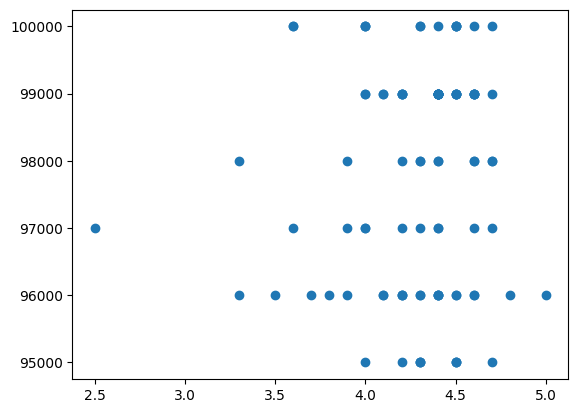

In [48]:
df=df.sort_values(by='Size',ascending=False).head(100)
plt.scatter(x=df['Rating'],y=df['Size'])

**5. How does the type of app affect its price? Create a bar chart to compare average prices by app type.**

In [38]:
df['Price']=df['Price'].astype('int')

In [ ]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

In [ ]:
avg_price=df.groupby('App')['Price'].mean().head(30)
avg_price

App
AW Reader: news & apps [Dutch]                0.0
AX-PIC Pedidos                                0.0
AirWatch Inbox                                0.0
Best Fiends - Free Puzzle Game                0.0
Bits Watch Face                               0.0
ByssWeather for Wear OS                       0.0
Harry Potter: Hogwarts Mystery                0.0
Pujie Black Watch Face for Android Wear OS    NaN
Ultimate Watch 2 watch face                   NaN
VLC for Android                               0.0
Name: Price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AW Reader: news & apps [Dutch]'),
  Text(1, 0, 'AX-PIC Pedidos'),
  Text(2, 0, 'AirWatch Inbox'),
  Text(3, 0, 'Best Fiends - Free Puzzle Game'),
  Text(4, 0, 'Bits Watch Face'),
  Text(5, 0, 'ByssWeather for Wear OS'),
  Text(6, 0, 'Harry Potter: Hogwarts Mystery'),
  Text(7, 0, 'Pujie Black Watch Face for Android Wear OS'),
  Text(8, 0, 'Ultimate Watch 2 watch face'),
  Text(9, 0, 'VLC for Android')])

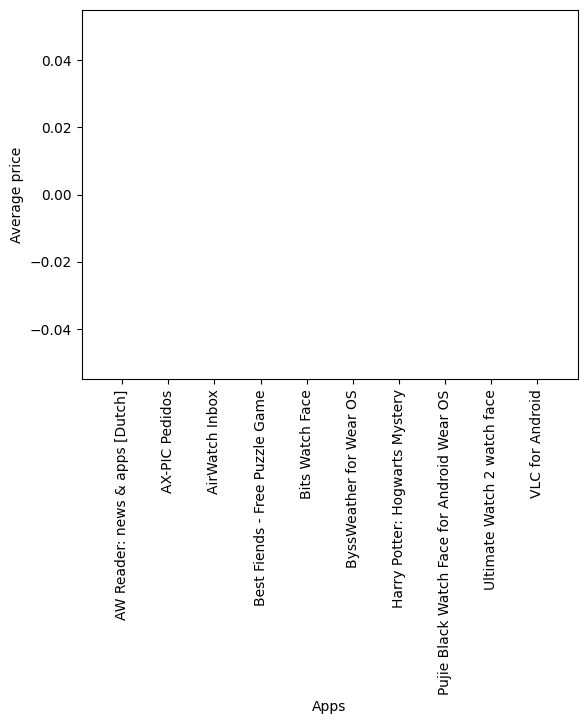

In [ ]:
avg_price=df.groupby('App')['Price'].mean().head(30)
plt.bar(avg_price.index,avg_price.values)
plt.xlabel('Apps')
plt.ylabel('Average price')
plt.xticks(rotation=90)

**6.What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.**

In [49]:
top_apps=df.sort_values(by='Installs',ascending=False).head(10)
top_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1709,Score! Hero,GAME,4.6,5418675,96000.0,100000000,Free,0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586,99000.0,100000000,Free,0,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1697,My Talking Angela,GAME,4.5,9881829,99000.0,100000000,Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up
1680,Angry Birds Classic,GAME,4.4,5566669,97000.0,100000000,Free,0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up
1660,Clash Royale,GAME,4.6,23133508,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
2007,Jetpack Joyride,GAME,4.4,4638163,96000.0,100000000,Free,0,Everyone 10+,Arcade,"July 19, 2018",1.10.12,4.1 and up
1781,Trivia Crack,GAME,4.5,6427773,95000.0,100000000,Free,0,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up
7404,SimCity BuildIt,FAMILY,4.5,4218587,100000.0,50000000,Free,0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up


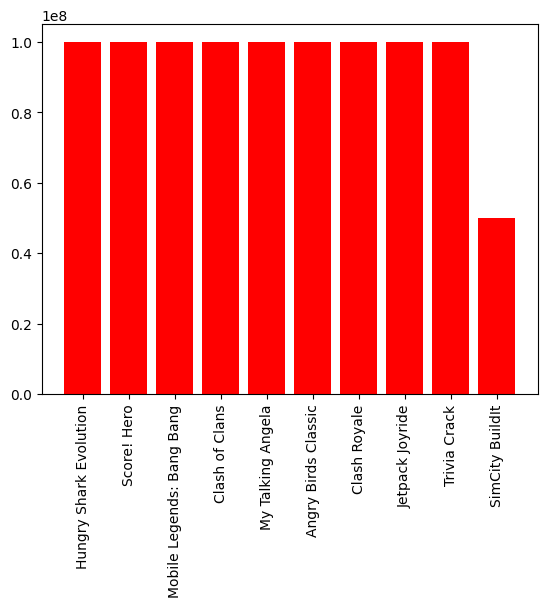

In [102]:
plt.bar(top_apps['App'],top_apps['Installs'],color='red')
plt.xticks(rotation=90)
plt.show()

**7.A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?**

1.Data Exploration:
Start by loading the dataset and exploring its structure. Understand the columns and the type of data available. Check for any missing values and handle them appropriately, either by removing or imputing them.

2.Data Cleaning:
Clean the data by addressing any inconsistencies, such as misspellings, duplicates, or outliers.
Ensure that relevant columns are of the correct data type for analysis.

3.Feature Selection:
Identify the features that are relevant to determining the popularity of an app category. These may include:
App category (e.g., Education, Games, Social)

4. Data Aggregation:
Aggregate the data by app category to calculate metrics such as the average number of installs, average ratings, and total number of reviews for each category.

5.Analysis:
Analyze the aggregated data to identify the most popular app categories based on various metrics. For example:
Determine the categories with the highest average number of installs or ratings.
Identify categories with a large number of apps but relatively low average ratings or installs, which may indicate a less saturated market.
Consider trends over time by analyzing changes in popularity across different time periods.

6.Visualization:
Visualize the findings using appropriate charts and graphs, such as bar plots, scatter plots, or pie charts. This will help stakeholders easily understand the insights derived from the data.
Recommendations:


In [51]:
#top 10 categories having high number of apps
counts=df['Category'].value_counts()
counts.groupby(df['App'])
df_top_categories=counts.head(10)
df_top_categories

GAME                  47
FAMILY                31
MEDICAL                3
SPORTS                 3
HEALTH_AND_FITNESS     2
LIBRARIES_AND_DEMO     2
BUSINESS               2
PARENTING              2
FINANCE                1
LIFESTYLE              1
Name: Category, dtype: int64

<BarContainer object of 10 artists>

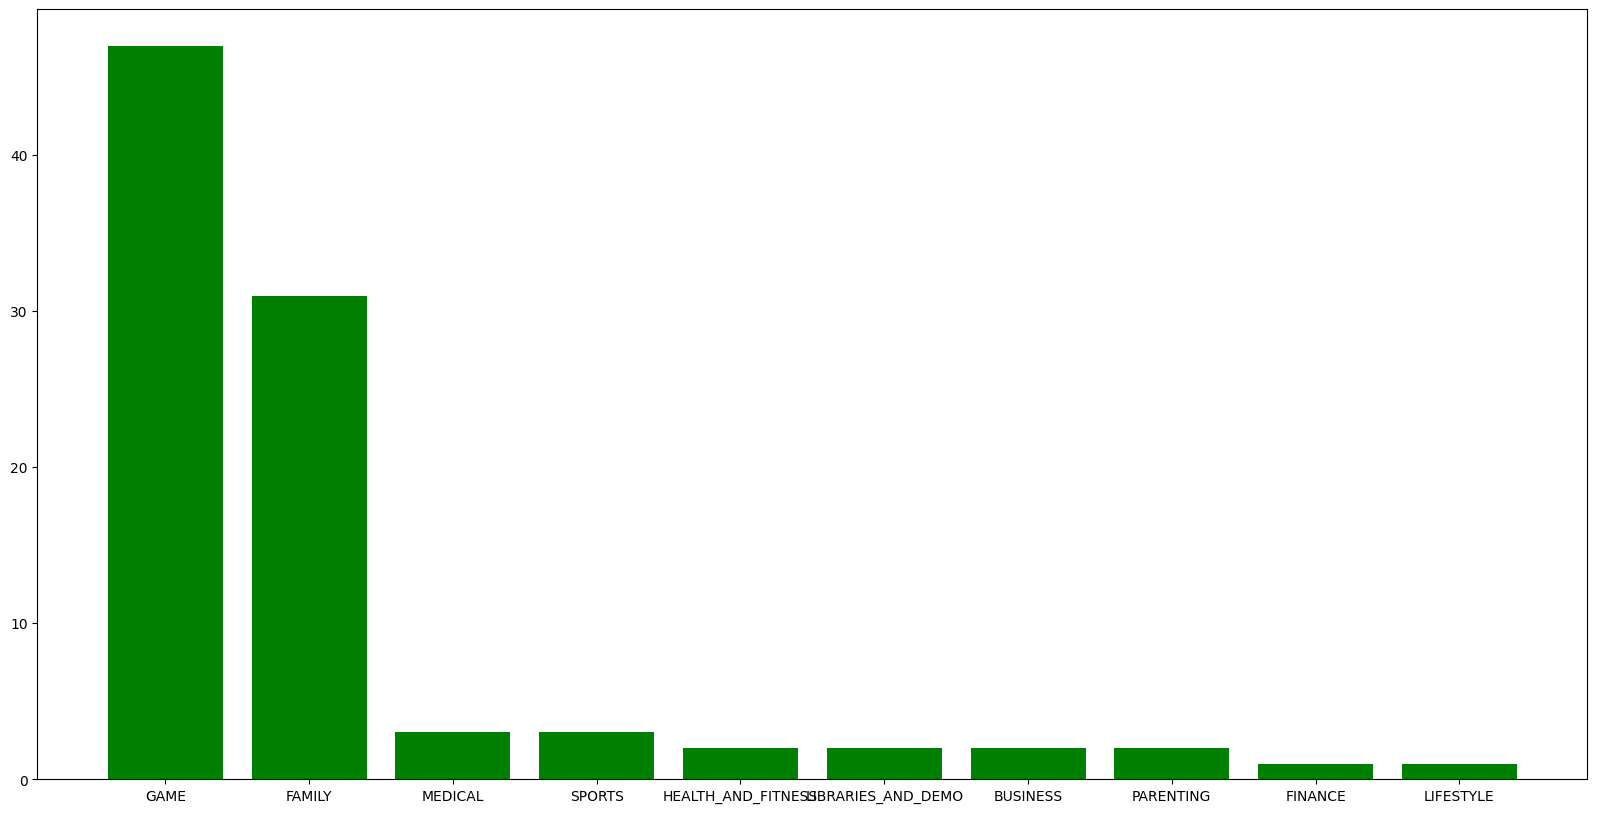

In [104]:
plt.figure(figsize=(20,10))
plt.bar(df_top_categories.index,df_top_categories,color='green')

In [54]:
#top 10 apps with the larger size
df.dropna(subset=['Size'], inplace=True)
top_apps2=df.sort_values(by='Size',ascending=False).head(10)
top_apps2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000.0,5000,Free,0,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000.0,500,Paid,15,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100000.0,5000000,Free,0,Everyone,Sports,"May 11, 2018",25.7,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000.0,5000000,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100000.0,10000000,Free,0,Mature 17+,Simulation,"May 31, 2018",2.1,4.0 and up
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100000.0,1000000,Paid,0,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000.0,10000000,Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
7404,SimCity BuildIt,FAMILY,4.5,4218587,100000.0,50000000,Free,0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up
1080,Post Bank,FINANCE,4.5,60449,100000.0,1000000,Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up


<Axes: xlabel='App', ylabel='Size'>

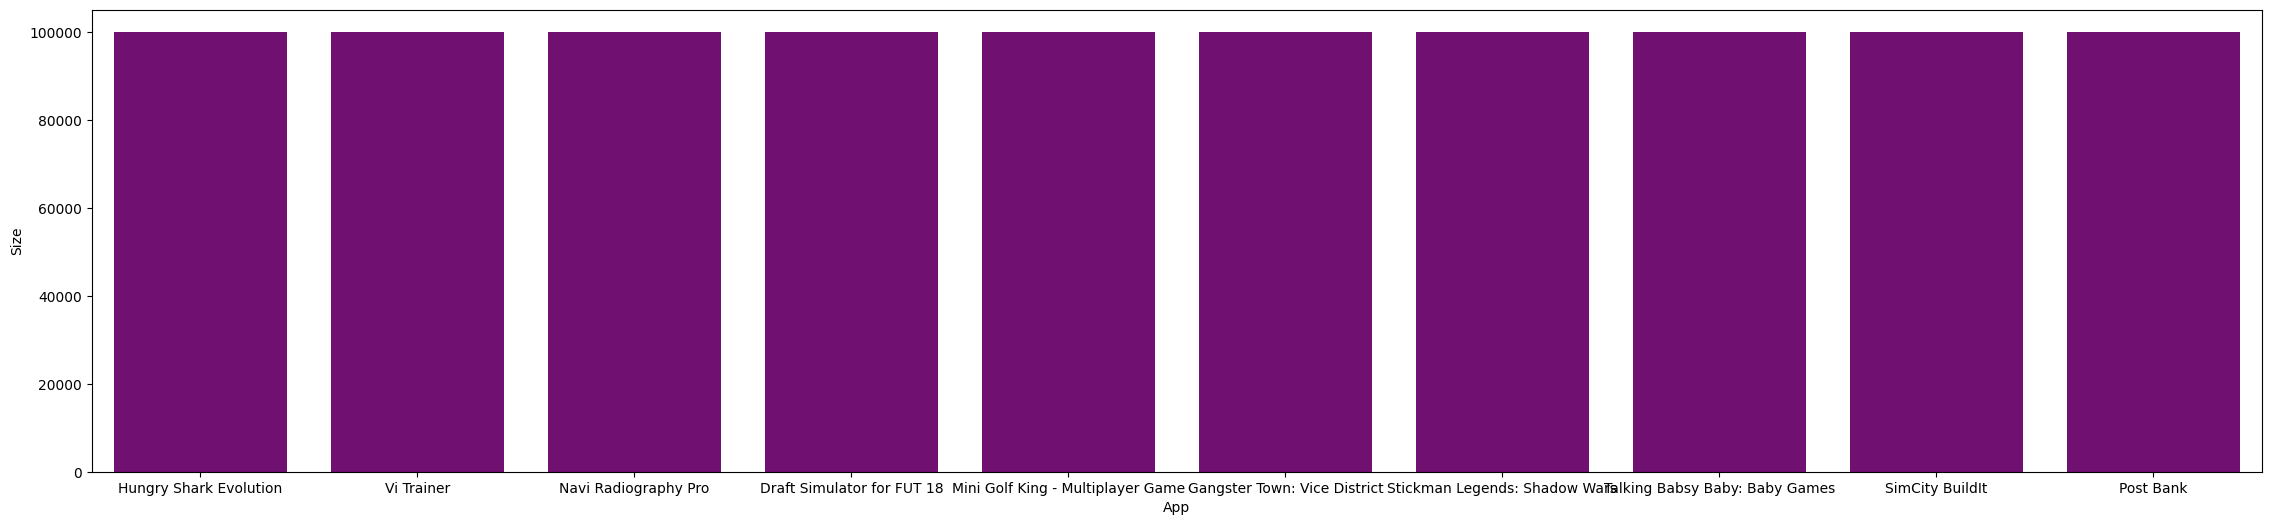

In [63]:
plt.figure(figsize=(28,6))
sns.barplot(x=top_apps2['App'],y=top_apps2['Size'],color='purple')

**8.A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?**

To identify the most successful app developers in the Google Play Store dataset, I would analyze the following features:

1.Number of Downloads/Installs:
Apps with a high number of downloads or installs indicate popularity and success.

2.Ratings and Reviews:
Higher ratings and a large number of positive reviews suggest user satisfaction and engagement with the app.

3.App Updates:
Regular updates indicate developer commitment to improving the app and addressing user feedback.

4.5App Size:
Smaller app sizes are generally preferred by users, potentially leading to higher adoption rates.

5.Price:
Free or low-cost apps may attract more users, while premium apps could indicate higher quality or specialized offerings.

6.Retention Rate:
Apps with high user retention rates are likely to be successful in the long term.

For data visualizations, I would use the following:
Bar Charts:
To compare the number of downloads/installs, ratings, and reviews for different developers.
Scatter Plots:
To visualize the relationship between app size, ratings, and number of installs.
Pie Charts:
To show the distribution of free vs. paid apps by each developer.
Line Charts:
To track the frequency of app updates over time for each developer.


In [61]:
#whuch has high ratings
df.dropna(subset=['Rating'], inplace=True)
top_apps3=df.sort_values(by='Rating',ascending=False).head(10)
top_apps3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5489,AP Art History Flashcards,FAMILY,5.0,1,96000.0,10,Paid,29,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up
4799,PewDiePie's Tuber Simulator,FAMILY,4.8,1499466,96000.0,10000000,Free,0,Teen,Casual,"July 24, 2018",1.25.0,4.1 and up
3582,Favorite children's songs,PARENTING,4.7,39,95000.0,10000,Free,0,Everyone,Parenting,"July 6, 2018",1.2.5,4.2 and up
7608,We Bare Bears Match3 Repairs,FAMILY,4.7,39153,98000.0,1000000,Free,0,Everyone,Puzzle,"July 25, 2018",1.1.7,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000.0,500,Paid,15,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3586,Mozart Baby Sleep,PARENTING,4.7,107,98000.0,50000,Free,0,Teen,Parenting,"July 9, 2018",1.4.0,4.2 and up
2349,Teach Me Anatomy,MEDICAL,4.7,9945,97000.0,500000,Free,0,Everyone,Medical,"July 5, 2018",5.11,4.1 and up
1863,Idle Heroes,GAME,4.7,416540,99000.0,10000000,Free,0,Everyone 10+,Role Playing,"May 30, 2018",1.14.0,2.3 and up
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1660,Clash Royale,GAME,4.6,23133508,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


<Axes: xlabel='App', ylabel='Rating'>

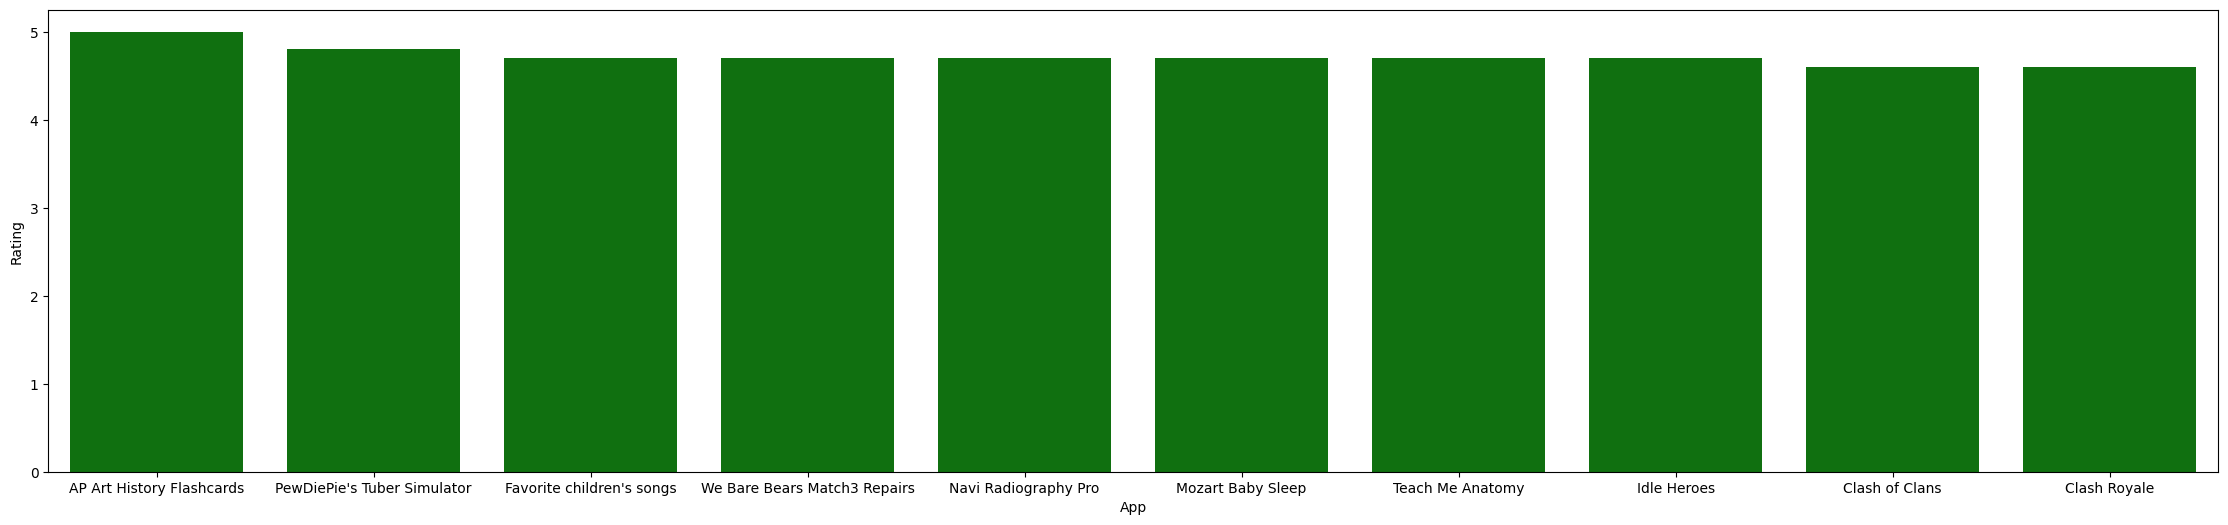

In [64]:
plt.figure(figsize=(28,6))
sns.barplot(x=top_apps3['App'],y=top_apps3['Rating'],color='green')

In [68]:
#having high installs
df.dropna(subset=['Installs'], inplace=True)
top_apps4=df.sort_values(by='Installs',ascending=False).head(10)
top_apps4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1697,My Talking Angela,GAME,4.5,9881829,99000.0,100000000,Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up
1781,Trivia Crack,GAME,4.5,6427773,95000.0,100000000,Free,0,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up
2007,Jetpack Joyride,GAME,4.4,4638163,96000.0,100000000,Free,0,Everyone 10+,Arcade,"July 19, 2018",1.10.12,4.1 and up
1709,Score! Hero,GAME,4.6,5418675,96000.0,100000000,Free,0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up
1660,Clash Royale,GAME,4.6,23133508,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1680,Angry Birds Classic,GAME,4.4,5566669,97000.0,100000000,Free,0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586,99000.0,100000000,Free,0,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
7515,Clash of Kings : The King Of Fighters version,FAMILY,4.2,2233681,97000.0,50000000,Free,0,Teen,Strategy,"August 1, 2018",3.44.0,2.3.3 and up


<Axes: xlabel='App', ylabel='Installs'>

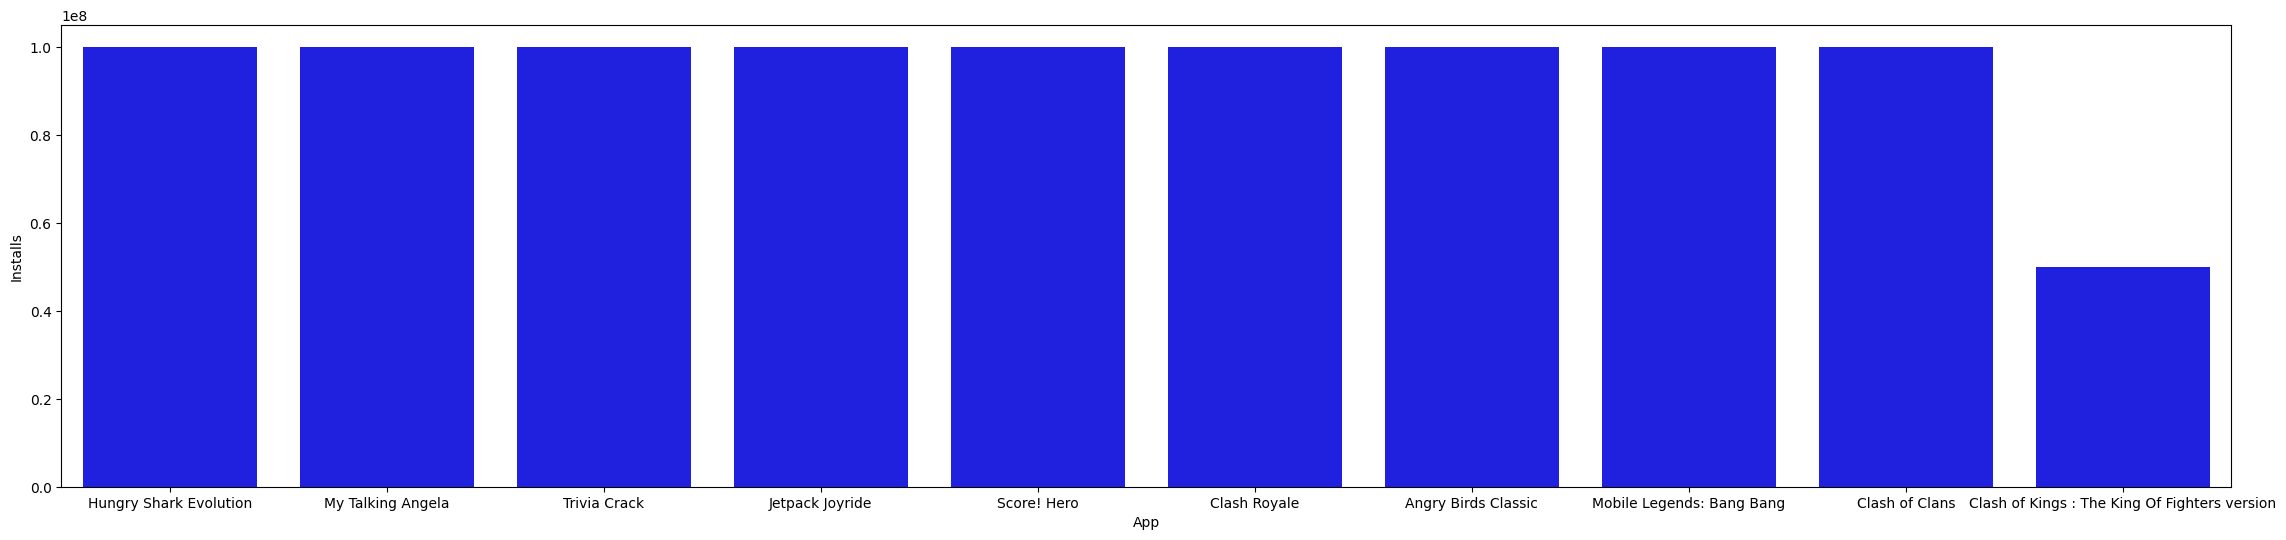

In [69]:
plt.figure(figsize=(28,6))
sns.barplot(x=top_apps4['App'],y=top_apps4['Installs'],color='blue')

**9.A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?**

To identify the best time to launch a new app in the Google Play Store dataset, I would analyze the following features:

Trend Analysis, Number of Installs, Ratings and Reviews, Competition, Category Analysis




In [83]:
#changing the data of date_of_journey
df['last_updated_month']=df['Last Updated'].str.split(' ').str[0]
df['last_updated_date']=df['Last Updated'].str.split(' ').str[1]
df['last_updated_year']=df['Last Updated'].str.split(',').str[1]
df['last_updated_date']=df['last_updated_date'].str.replace(',','')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,year,last_updated_month,last_updated_date,last_updated_year
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,July,"25,",2018,July,25,2018
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000.0,500,Paid,15,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up,January,"14,",2018,January,14,2018
5862,Miami crime simulator,GAME,4.0,254518,100000.0,10000000,Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up,July,"9,",2018,July,9,2018
5427,Ultimate Tennis,SPORTS,4.3,183004,100000.0,10000000,Free,0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up,July,"19,",2018,July,19,2018
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100000.0,10000,Free,0,Everyone,Racing,"May 20, 2018",1.03,4.1 and up,May,"20,",2018,May,20,2018


In [85]:
#having high installs according to last updated months
#df.dropna(subset=['Installs'], inplace=True)
top_apps5=df.sort_values(by='Installs',ascending=False).head(10)
top_apps5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,year,last_updated_month,last_updated_date,last_updated_year
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000.0,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,July,"25,",2018,July,25,2018
1697,My Talking Angela,GAME,4.5,9881829,99000.0,100000000,Free,0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up,July,"3,",2018,July,3,2018
1781,Trivia Crack,GAME,4.5,6427773,95000.0,100000000,Free,0,Everyone,Trivia,"August 3, 2018",2.79.0,4.1 and up,August,"3,",2018,August,3,2018
2007,Jetpack Joyride,GAME,4.4,4638163,96000.0,100000000,Free,0,Everyone 10+,Arcade,"July 19, 2018",1.10.12,4.1 and up,July,"19,",2018,July,19,2018
1709,Score! Hero,GAME,4.6,5418675,96000.0,100000000,Free,0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up,June,"13,",2018,June,13,2018
1660,Clash Royale,GAME,4.6,23133508,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,June,"27,",2018,June,27,2018
1680,Angry Birds Classic,GAME,4.4,5566669,97000.0,100000000,Free,0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up,May,"24,",2018,May,24,2018
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586,99000.0,100000000,Free,0,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up,July,"24,",2018,July,24,2018
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,July,"15,",2018,July,15,2018
7515,Clash of Kings : The King Of Fighters version,FAMILY,4.2,2233681,97000.0,50000000,Free,0,Teen,Strategy,"August 1, 2018",3.44.0,2.3.3 and up,August,"1,",2018,August,1,2018


Text(0.5, 1.0, 'Installations according to last updated months')

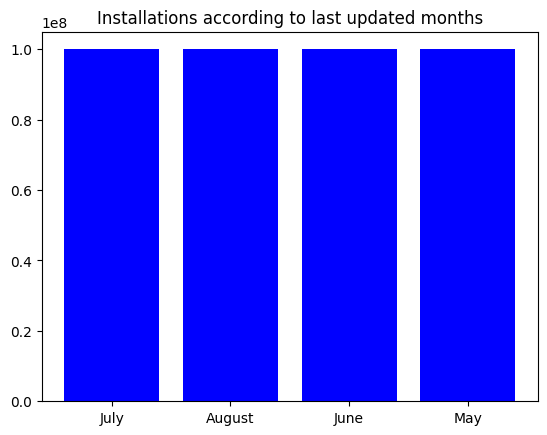

In [93]:
plt.bar(top_apps5['last_updated_month'],top_apps5['Installs'],color='blue')
plt.title("Installations according to last updated months")

In [94]:
#which has high ratings according to months
df.dropna(subset=['Rating'], inplace=True)
top_apps6=df.sort_values(by='Rating',ascending=False).head(10)
top_apps6

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,date,year,last_updated_month,last_updated_date,last_updated_year
5489,AP Art History Flashcards,FAMILY,5.0,1,96000.0,10,Paid,29,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up,January,"19,",2016,January,19,2016
4799,PewDiePie's Tuber Simulator,FAMILY,4.8,1499466,96000.0,10000000,Free,0,Teen,Casual,"July 24, 2018",1.25.0,4.1 and up,July,"24,",2018,July,24,2018
3582,Favorite children's songs,PARENTING,4.7,39,95000.0,10000,Free,0,Everyone,Parenting,"July 6, 2018",1.2.5,4.2 and up,July,"6,",2018,July,6,2018
7608,We Bare Bears Match3 Repairs,FAMILY,4.7,39153,98000.0,1000000,Free,0,Everyone,Puzzle,"July 25, 2018",1.1.7,4.1 and up,July,"25,",2018,July,25,2018
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000.0,500,Paid,15,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up,January,"14,",2018,January,14,2018
3586,Mozart Baby Sleep,PARENTING,4.7,107,98000.0,50000,Free,0,Teen,Parenting,"July 9, 2018",1.4.0,4.2 and up,July,"9,",2018,July,9,2018
2349,Teach Me Anatomy,MEDICAL,4.7,9945,97000.0,500000,Free,0,Everyone,Medical,"July 5, 2018",5.11,4.1 and up,July,"5,",2018,July,5,2018
1863,Idle Heroes,GAME,4.7,416540,99000.0,10000000,Free,0,Everyone 10+,Role Playing,"May 30, 2018",1.14.0,2.3 and up,May,"30,",2018,May,30,2018
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,July,"15,",2018,July,15,2018
1660,Clash Royale,GAME,4.6,23133508,97000.0,100000000,Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,June,"27,",2018,June,27,2018


Text(0.5, 1.0, 'Ratings according to last updated months')

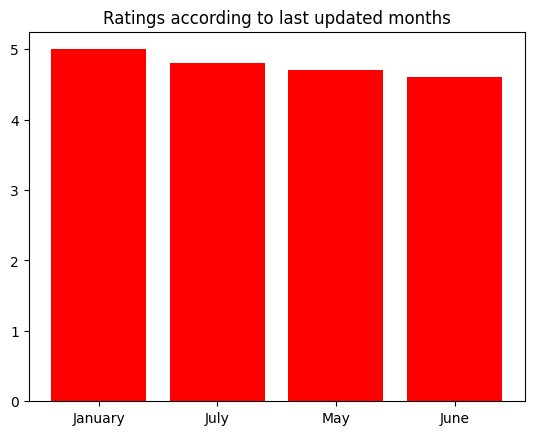

In [97]:
plt.bar(top_apps6['last_updated_month'],top_apps6['Rating'],color='red')
plt.title("Ratings according to last updated months")

Text(0.5, 1.0, 'Installations according to last updated dates')

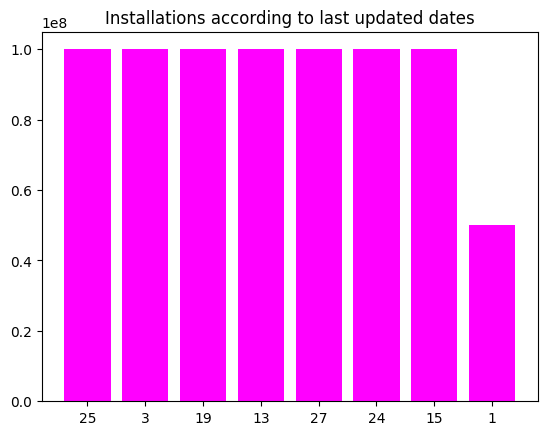

In [99]:
#high installations according to last updated dates
plt.bar(top_apps5['last_updated_date'],top_apps5['Installs'],color='magenta')
plt.title("Installations according to last updated dates")